KernelRidge with kernel='poly' has best accuracy,it has highest R-Square value and lowest Mean squared error value. The performance measure actually tell me that I didn't get good result. I use a grid search to try out best parameter values. Attributes 'id' and 'date' are irrelevant to training. Attribute 'type' is the target of prediction. I transformed "classification_data2.txt" to "classification_data2.csv" and fixed format problem. 

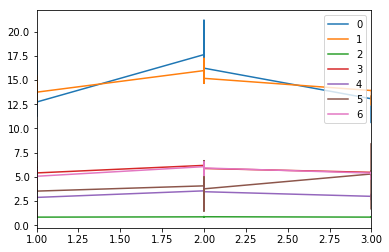

Coefficients: 
 [  1.48907206  -3.22037506 -30.67743866  -2.31510066   0.24598421
   0.1148875    2.1925973 ]
data size: 211


In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (r2_score, mean_squared_error)

regression = pd.read_csv("./classification_data2.csv")
regression.head()
Y = regression.type.values
#Drop attribute : 'type'
regression = regression.drop(['type'], axis=1)
X = regression.as_matrix()
t = pd.DataFrame(X,index = Y )
t.plot()
plt.show()

regression_X_train = X[:]
regression_y_train = Y[:]
lr = LinearRegression(normalize=True)
lr.fit(regression_X_train, regression_y_train)
print('Coefficients: \n', lr.coef_)
print('data size: 211')

In [37]:
#KernelRidge with kernel='linear'
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
#Split the data set into a training set of 80% and a testing set of 20%
regression_X_train = X[:-42]
regression_X_test =  X[(211-42):211]

regression_y_train = Y[:-42]
regression_y_test =  Y[(211-42):211]
lr = GridSearchCV(KernelRidge(kernel='linear', gamma=1), cv=5,
                  param_grid={"alpha": [2,4,7],
                              "gamma": [0.1, 0.5, 1, 2, 4]})
#GridSearchCV is with 5-fold cross-validation
lr.fit = lr.fit(regression_X_train, regression_y_train)
regression_y_train1 = lr.predict(regression_X_train)
dataPred = lr.predict(regression_X_test)
print("R^2 on test dataset by Linear KRR: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by Linear KRR:  0.0
#Mean squared error: 0.68

R^2 on test dataset by Linear KRR:  0.0
Mean squared error: 0.68


In [24]:
#KernelRidge with kernel='poly'
#Split the data set into a training set of 80% and a testing set of 20%
regression_X_train = X[:-42]
regression_X_test =  X[(211-42):211]

regression_y_train = Y[:-42]
regression_y_test =  Y[(211-42):211]
lr = GridSearchCV(KernelRidge(kernel='poly', gamma=1), cv=5,
                  param_grid={"alpha": [2,4,7],
                              "gamma": [0.1, 0.5, 1, 2, 4]})
#GridSearchCV is with 5-fold cross-validation and it includes grid search
lr.fit = lr.fit(regression_X_train, regression_y_train)
regression_y_train1 = lr.predict(regression_X_train)
dataPred = lr.predict(regression_X_test)
print("R^2 on test dataset by poly KRR: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by poly KRR:  0.0
#Mean squared error: 0.49

R^2 on test dataset by poly KRR:  0.0
Mean squared error: 0.49


In [25]:
#KernelRidge with kernel='rbf'
#Split the data set into a training set of 80% and a testing set of 20%
regression_X_train = X[:-42]
regression_X_test =  X[(211-42):211]

regression_y_train = Y[:-42]
regression_y_test =  Y[(211-42):211]
lr = GridSearchCV(KernelRidge(kernel='rbf', gamma=1), cv=5,
                  param_grid={"alpha": [2,4,7],
                              "gamma": [0.1, 0.5, 1, 2, 4]})
#GridSearchCV is with 5-fold cross-validation
lr.fit = lr.fit(regression_X_train, regression_y_train)
regression_y_train1 = lr.predict(regression_X_train)
dataPred = lr.predict(regression_X_test)
print("R^2 on test dataset by rbf KRR: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by rbf KRR:  0.0
#Mean squared error: 0.60

R^2 on test dataset by rbf KRR:  0.0
Mean squared error: 0.60


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 0  0  0]
 [35  0  0]
 [35 35  0]]


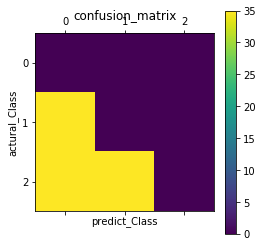

R^2 on test dataset by Logistic Regression:  -11.3857142857
Mean squared error: 2.75


In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression   
#Split the data set
regression_X_train = X[:-105]
regression_X_test =  X[(211-106):211]

regression_y_train = Y[:-105]
regression_y_test =  Y[(211-106):211]
lr = GridSearchCV(LogisticRegression(), cv=5,param_grid={})   
lr.fit = lr.fit(regression_X_train, regression_y_train)
dataPred = lr.predict(regression_X_test)

from sklearn.metrics import confusion_matrix  
print (dataPred)
confusion_matrix=confusion_matrix(regression_y_test,regression_y_train)
print (confusion_matrix)
plt.matshow(confusion_matrix)
plt.title(u'confusion_matrix')
plt.colorbar()
plt.ylabel(u'actural_Class')
plt.xlabel(u'predict_Class')
plt.show()
from sklearn.cross_validation import cross_val_score
print("R^2 on test dataset by Logistic Regression: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by Logistic Regression:  -11.3857142857
#Mean squared error: 2.75

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 1 2 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 0  0  0]
 [35  0  0]
 [35 35  0]]


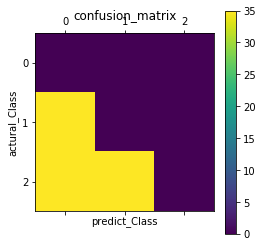

R^2 on test dataset by Hard margin SVM:  -11.2571428571
Mean squared error: 2.72


In [27]:
#Hard margin SVM
from sklearn import svm
#Split the data set
regression_X_train = X[:-105]
regression_X_test =  X[(211-106):211]

regression_y_train = Y[:-105]
regression_y_test =  Y[(211-106):211] 
#lr = GridSearchCV(svm.SVC(), cv=5,param_grid={'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]})
lr = GridSearchCV(svm.SVC(), cv=5,param_grid={})
#lr.fit(regression_X_train, regression_y_train)    
lr.fit = lr.fit(regression_X_train, regression_y_train)
dataPred = lr.predict(regression_X_test)
from sklearn.metrics import confusion_matrix  
print (dataPred)
confusion_matrix=confusion_matrix(regression_y_test,regression_y_train)
print (confusion_matrix)
plt.matshow(confusion_matrix)
plt.title(u'confusion_matrix')
plt.colorbar()
plt.ylabel(u'actural_Class')
plt.xlabel(u'predict_Class')
plt.show()
from sklearn.cross_validation import cross_val_score
print("R^2 on test dataset by Hard margin SVM: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by Hard margin SVM:  -11.2571428571
#Mean squared error: 2.72

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 0  0  0]
 [35  0  0]
 [35 35  0]]


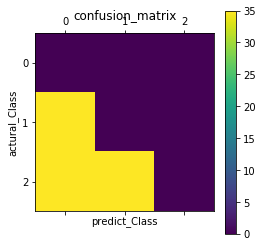

R^2 on test dataset by Soft margin SVM:  -11.3
Mean squared error: 2.73


In [28]:
#Soft margin SVM
from sklearn import svm
#Split the data set
regression_X_train = X[:-105]
regression_X_test =  X[(211-106):211]

regression_y_train = Y[:-105]
regression_y_test =  Y[(211-106):211]  
lr = GridSearchCV(svm.SVC(), cv=5,param_grid={'C': [0.1, 0.5, 1, 2, 5]})
#lr = GridSearchCV(svm.SVC(), cv=5,param_grid={})
#lr.fit(regression_X_train, regression_y_train)    
lr.fit = lr.fit(regression_X_train, regression_y_train)
dataPred = lr.predict(regression_X_test)

from sklearn.metrics import confusion_matrix  
print (dataPred)
confusion_matrix=confusion_matrix(regression_y_test,regression_y_train)
print (confusion_matrix)
plt.matshow(confusion_matrix)
plt.title(u'confusion_matrix')
plt.colorbar()
plt.ylabel(u'actural_Class')
plt.xlabel(u'predict_Class')
plt.show()
from sklearn.cross_validation import cross_val_score
#scores=cross_val_score(regression_X_train,regression_y_train,cv=5)
#print ('accuracy',np.mean(scores),scores)
print("R^2 on test dataset by Soft margin SVM: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by Soft margin SVM:  -11.3
#Mean squared error: 2.73